In [25]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from numpy.typing import NDArray
from scipy import fftpack
from matplotlib.colors import LogNorm

In [26]:
def plot_spectrum(spectrum: NDArray):
    # use logarithmic coloring
    plt.imshow(np.abs(spectrum), norm=LogNorm(vmin=5))
    plt.colorbar()


def fourier_transform(input_image: NDArray) -> NDArray:
    return fftpack.fft2(input_image)


def inverse_fourier_transform(transformed: NDArray) -> NDArray:
    return fftpack.ifft2(transformed).real


def denoise(transformed: NDArray, keep_fraction: float) -> NDArray:
    filtered = transformed.copy()
    rows, cols = filtered.shape
    filtered[int(rows*keep_fraction):int(rows*(1-keep_fraction))] = 0
    filtered[:, int(cols*keep_fraction):int(cols*(1-keep_fraction))] = 0
    return filtered


In [27]:
image_url = "https://scipy-lectures.org/_downloads/moonlanding.png"
image = np.array(PIL.Image.open(urllib.request.urlopen(image_url)))  # noqa

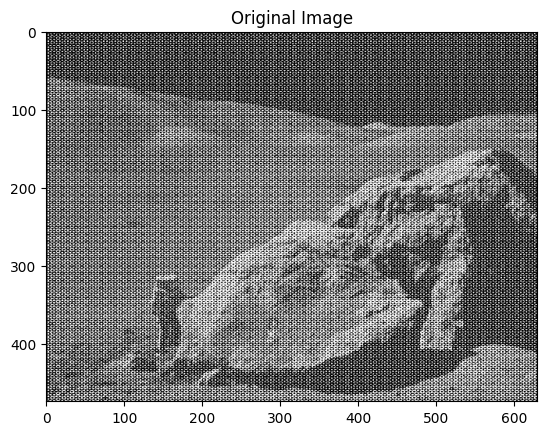

In [28]:
plt.figure()
_ = plt.imshow(image, plt.cm.gray)
_ = plt.title("Original Image")

In [29]:
transformed_image = fourier_transform(image)
transformed_denoised_image = denoise(transformed_image, keep_fraction=0.1)
denoised_image = inverse_fourier_transform(transformed_denoised_image)

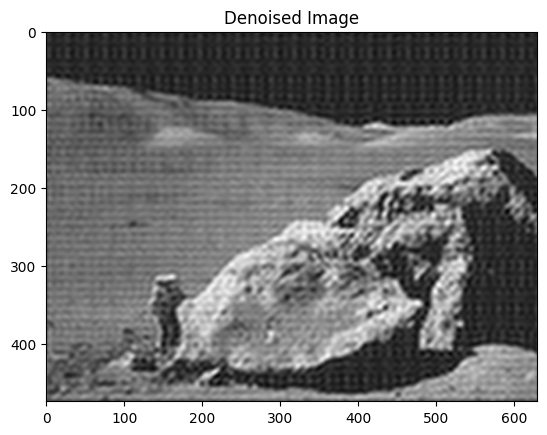

In [30]:
plt.figure()
_ = plt.imshow(denoised_image, plt.cm.gray)
_ = plt.title("Denoised Image")